In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numba

### Pyplot parameters for plotting
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',  # Use a serif font
    'font.size': 10,         # Adjust the font size to match your LaTeX document
})

# For a two-column document, set the figure width to be within the column width
column_width_pt = 246  # Adjust this based on your document's column width
inches_per_pt = 1/72.27
golden_ratio = (5**0.5 - 1) / 2  # Golden ratio to make the figure aesthetically pleasing

fig_width = column_width_pt * inches_per_pt
fig_height = fig_width * golden_ratio



plt.style.use('default')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"],
          "lines.linewidth" : 1.2,
          'xtick.minor.width' : 0.75,
          'xtick.major.width' : 0.75,
          'ytick.minor.width' : 0.75,
          'ytick.major.width' : 0.75,
          'axes.spines.top' : True,
          'axes.spines.right' : True,
          'axes.linewidth' : 1.5}
plt.rcParams.update(params)
plt.rc('figure', figsize=(fig_width, fig_height))
plt.rc('legend', frameon=False)
plt.rc('xtick', direction='in')
plt.rc('ytick', direction='in')

def blocking_cv(x,temperatura, n = 1000):
    x = np.array(x)
    n0 = int(len(x)/n)
    cvs = np.zeros(n0)
    for idx in range(n0):
        e0 = x[idx*n:(idx+1)*n]
        e0sq = np.power(e0,2)
        cvs[idx] = (np.mean(e0sq)-np.mean(e0)**2)/(temperatura*temperatura)
    return (np.mean(cvs),np.sqrt(np.mean(np.power(cvs,2))-np.mean(cvs)**2))

def bootstrap_cv(x, temperatura, n=100):
    x = np.array(x)
    cvs = np.zeros(n)
    for iteration in range(n):
        x_resampled = np.random.choice(x,len(x))
        cvs[iteration] = (np.mean(np.power(x_resampled,2))-np.mean(x_resampled)**2)/(temperatura**2)

    return (np.mean(cvs),np.sqrt(np.mean(np.power(cvs,2))-np.mean(cvs)**2))

def process_data(fileRoot,numFiles,nSpins, distances, bootstrap_n = 1000):  
    e_mean = np.zeros(numFiles)
    m_mean = np.zeros(numFiles)
    cv_mean = np.zeros(numFiles)
    cv_mean_err = np.zeros(numFiles)
    corr_mean = np.zeros((distances+1,numFiles))
    amount = 0
    headers = ['Energia','Magnetizacion','Temperatura']
    temp_list = []
    for idx in range(distances+1):
        headers.append('Corr'+str(idx))
    for idx in range(numFiles):
        procesos_df = pd.read_csv(fileRoot+str(idx)+".csv",delimiter="\t", skiprows = 1, header = None,names = headers)
        e = np.array(procesos_df["Energia"].to_list())
        print("Unit cells: ",int(nSpins/24),"Current file idx",idx,'       ',end ='\r')
        m = np.array(procesos_df["Magnetizacion"].to_list())
        t = np.array(procesos_df["Temperatura"].to_list())
        t = t[0]
        #print(t)
        #plt.plot(e[:100])
        e_mean[idx] = np.mean(e)
        cvs =  bootstrap_cv(e,t,n = bootstrap_n)
        cv_mean[idx] += cvs[0]
        cv_mean_err[idx] += cvs[1]
        m_mean[idx] = np.mean(m)
        temp_list.append(t)
        
    return (corr_mean/(amount),e_mean/(nSpins),m_mean/(nSpins),cv_mean/(nSpins),cv_mean_err/(nSpins),np.array(temp_list))

### No external field

In [3]:
#corr64,e64,m64,cv64,cverr64, t64 = process_data("../PT-Data/0Field/DatosN64Proceso",50,24*64,9)
#corr1, e1,m1,cv1,cverr1, t1 = process_data("../PT-Data/0Field/DatosN1Proceso",50,24,-1)
#corr8, e8,m8,cv8,cverr8, t8 = process_data("../PT-Data/0Field/DatosN8Proceso",50,24*8,-1)
corr512, e512,m512,cv512,cverr512, t512 = process_data("../PT-Data/0Field/DatosN512Proceso",50,24*512,-1)

In [4]:
np.save("./ProcessedData/corr512.npy",corr512)
np.save("./ProcessedData/e512.npy",e512)
np.save("./ProcessedData/m512.npy",m512)
np.save("./ProcessedData/cv512.npy",cv512)
np.save("./ProcessedData/cverr512.npy",cverr512)
np.save("./ProcessedData/t512.npy",t512)

# np.save("./corr64.npy",corr64)
# np.save("./e64.npy",e64)
# np.save("./m64.npy",m64)
# np.save("./cv64.npy",cv64)
# np.save("./cverr64.npy",cverr64)
# np.save("./t64.npy",t64)

# np.save("./e1.npy",e1)
# np.save("./m1.npy",m1)
# np.save("./cv1.npy",cv1)
# np.save("./cverr1.npy",cverr1)
# np.save("./t1.npy",t1)

# np.save("./e8.npy",e8)
# np.save("./m8.npy",m8)
# np.save("./cv8.npy",cv8)
# np.save("./cverr8.npy",cverr8)
# np.save("./t8.npy",t8)


In [17]:
corr64 = np.load("./ProcessedData/corr64.npy")
e64 = np.load("./ProcessedData/e64.npy")
m64 = np.load("./ProcessedData/m64.npy")
cv64 = np.load("./ProcessedData/cv64.npy")
cverr64 = np.load("./ProcessedData/cverr64.npy")
t64 = np.load("./ProcessedData/t64.npy")

e1 = np.load("./ProcessedData/e1.npy")
m1 = np.load("./ProcessedData/m1.npy")
cv1 = np.load("./ProcessedData/cv1.npy")
cverr1 = np.load("./ProcessedData/cverr1.npy")
t1 = np.load("./ProcessedData/t1.npy")

e8 = np.load("./ProcessedData/e8.npy")
m8 = np.load("./ProcessedData/m8.npy")
cv8 = np.load("./ProcessedData/cv8.npy")
cverr8 = np.load("./ProcessedData/cverr8.npy")
t8 = np.load("./ProcessedData/t8.npy")

corr512 = np.load("./ProcessedData/corr512.npy")
e512 = np.load("./ProcessedData/e512.npy")
m512 = np.load("./ProcessedData/m512.npy")
cv512 = np.load("./ProcessedData/cv512.npy")
cverr512 = np.load("./ProcessedData/cverr512.npy")
t512 = np.load("./ProcessedData/t512.npy")

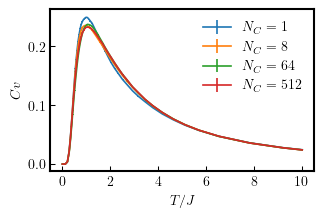

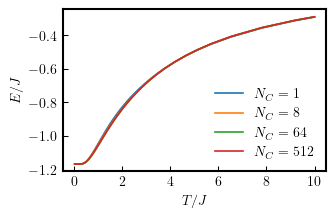

In [4]:
figCv, axCv = plt.subplots() 
axCv.errorbar(np.array(t1),cv1,2*cverr1, label = r'$N_C = 1$')
axCv.errorbar(np.array(t8),cv8,2*cverr8, label = r'$N_C = 8$')
axCv.errorbar(np.array(t64),cv64,2*cverr64, label = r'$N_C = 64$')
axCv.errorbar(np.array(t512),cv512,2*cverr512, label = r'$N_C = 512$')
axCv.set_ylabel(r'$Cv$')
axCv.set_xlabel(r'$T/J$')
axCv.legend()
figCv.savefig("./fig_chHypModels_Cv37.eps",format = 'eps',dpi=800, bbox_inches = 'tight',pad_inches = 0.03)
figCv.show()


figEnergy, axEnergy = plt.subplots()
axEnergy.plot(np.array(t1),e1, label = r'$N_C = 1$')
axEnergy.plot(np.array(t8),e8, label = r'$N_C = 8$')
axEnergy.plot(np.array(t64),e64, label = r'$N_C = 64$')
axEnergy.plot(np.array(t512),e512, label = r'$N_C = 512$')
axEnergy.set_ylabel(r'$E/J$')
axEnergy.set_xlabel(r'$T/J$')
axEnergy.legend()
figEnergy.savefig("./EnergyAntiferro.eps",format = 'eps',dpi=800, bbox_inches = 'tight',pad_inches = 0.03)
figEnergy.show()

In [43]:
corr64[-1,:] =corr64[-1,:]/(64*24) 

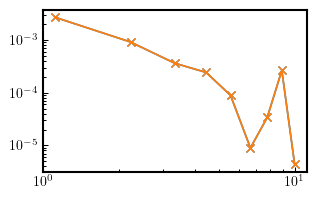

In [47]:
figCorr, axCorr = plt.subplots()
axCorr.plot(np.linspace(0,10,10)[1:],np.abs(corr64)[1:,0],'x-', label = r'$N_C = 1$')
axCorr.plot(np.linspace(0,10,10)[1:],np.abs(corr64)[1:,1],'x-', label = r'$N_C = 1$')
axCorr.set_xscale('log')
axCorr.set_yscale('log')

[0.21375503 0.22115679 0.23003014 0.22611943]


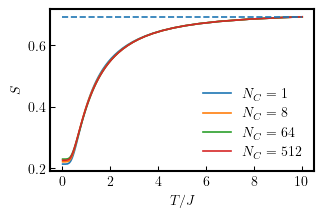

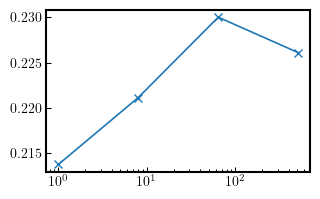

In [21]:
### Entropy calculation
from scipy.integrate import simps as simps
from scipy.integrate import trapz as trapz
def entropy(cv, temp):
    e1 = [np.log(2)-trapz(cv[n:]/temp[n:],temp[n:]) for n in range(len(cv))]
    return e1


figEntropy, axEntropy = plt.subplots()


axEntropy.plot(t1,entropy(cv1,t1), label = r'$N_C = 1$')
axEntropy.plot(t8,entropy(cv8,t8), label = r'$N_C = 8$')
axEntropy.plot(t64,entropy(cv64,t64), label = r'$N_C = 64$')
axEntropy.plot(t512,entropy(cv512,t512), label = r'$N_C = 512$')
axEntropy.hlines(np.log(2),0,10,linestyles='dashed')
axEntropy.set_ylabel(r'$S$')
axEntropy.set_xlabel(r'$T/J$')
axEntropy.legend()

entropies = np.array([entropy(cv1,t1)[0],entropy(cv8,t8)[0],entropy(cv64,t64)[0],entropy(cv512,t512)[0]])

figEntropy.savefig("./fig_chHypModels_entropy37.eps",format = 'eps',dpi=800, bbox_inches = 'tight',pad_inches = 0.03)
figEntropy.show()
print(entropies)
plt.figure(5)
plt.plot([1,8,64,512],entropies,'x-')
plt.xscale('log')

## With external field

In [2]:
corr48open, e48open,m48open,cv48open,cverr48open, t48open = process_data("../PT-Data/Open/DatosN0Proceso",50,48,-1,10)
corr363open, e363open,m363open,cv363open,cverr363open, t363open = process_data("../PT-Data/Open/DatosN1Proceso",50,363,-1,10)
corr960open, e960open,m960open,cv960open,cverr363open, t363open = process_data("../PT-Data/Open/DatosN2Proceso",50,960,-1,10)
#corr64, e64,m64,cv64,cverr64, t64 = process_data("../PT-Data/05Field/DatosN64Proceso",50,24*64,-1,10)

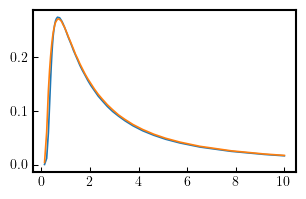

In [3]:
plt.plot(t48open[1:],cv48open[1:])
plt.plot(t363open[1:],cv363open[1:])


[ 0.16465821 -2.24636311]


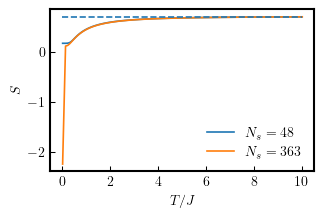

In [29]:
figEntropyOpen, axEntropyOpen = plt.subplots()

axEntropyOpen.plot(t48open,entropy(cv48open,t48open), label = r'$N_s = 48$')
axEntropyOpen.plot(t363open,entropy(cv363open,t363open), label = r'$N_s = 363$')
axEntropyOpen.hlines(np.log(2),0,10,linestyles='dashed')
axEntropyOpen.set_ylabel(r'$S$')
axEntropyOpen.set_xlabel(r'$T/J$')
axEntropyOpen.legend()

entropiesOpen = np.array([entropy(cv48open,t48open)[0],entropy(cv363open,t363open)[0]])
print(entropiesOpen)
figEntropyOpen.savefig("./fig_chHypModels_entropy37Open.eps",format = 'eps',dpi=800, bbox_inches = 'tight',pad_inches = 0.03)
figEntropyOpen.show()

### Temperature ladder

In [4]:
### Workers analysis

def process_workers(fileRoot,numFiles):
    procesos_dfs = []
    for idx in range(numFiles):
        procesos_dfs.append(pd.read_csv(fileRoot+str(idx)+".csv",delimiter="\t"))
    dfs = pd.concat(procesos_dfs, join="inner")

    temp_list = sorted(list(dfs["Temperature"].value_counts().index))
    a_timeseries = []
    m_timeseries = []
    for t in temp_list:
        a_timeseries.append(np.array(dfs[dfs["Temperature"] == t]["Accepts"].to_list()))
        m_timeseries.append(np.array(dfs[dfs["Temperature"] == t]["Total"].to_list()))
    a_mean = np.sum(np.array(a_timeseries),axis = 1)
    m_mean = np.sum(np.array(m_timeseries),axis = 1)
    plt.plot(temp_list,a_mean/m_mean)
    plt.show()
    return procesos_dfs
    

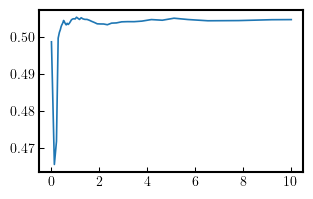

In [5]:
procesos_dfs = process_workers("../PT-Data/Open/CountersProceso2",50)

In [8]:
m = 50
from collections import Counter
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

t64 = np.array(t363open)
f_functions = []
upts = np.zeros(len(t64))
dwns = np.zeros(len(t64))
others = np.zeros(len(t64))
for n in range(m):
    print(n,'       ', end = '\r')
    ts = np.array(procesos_dfs[n].Temperature)
    labels = np.zeros(len(ts))
    currentLabel = 0
    for idx,t in enumerate(ts):
        if t == t64[0]:
            currentLabel = 1
        elif t==t64[-1]:
            currentLabel = -1
        labels[idx] = currentLabel    
        

    for idxt,t in enumerate(t64):
        upts[idxt] += np.sum((ts == t) & (labels == 1))
        dwns[idxt] += np.sum((ts == t) & (labels == -1))
        others[idxt] += np.sum((ts == t) & (labels == 0))


[1.00000000e+00 7.61513448e-01 2.17784537e-01 5.52177649e-02
 8.87815743e-03 3.55750312e-03 2.10877893e-03 1.61565614e-03
 1.37706560e-03 1.24077928e-03 1.13652749e-03 9.82322206e-04
 9.06230661e-04 8.96252962e-04 7.38071680e-04 6.87990707e-04
 6.33891251e-04 5.89797406e-04 6.19803265e-04 6.07754832e-04
 5.73703360e-04 4.89574761e-04 4.71554548e-04 4.95589752e-04
 5.37612879e-04 5.29591024e-04 5.15562995e-04 5.51593515e-04
 5.49570454e-04 5.41609853e-04 4.75512603e-04 4.49457548e-04
 4.47408036e-04 4.07360922e-04 3.07234727e-04 2.93203483e-04
 2.71188205e-04 3.21206857e-04 2.99167534e-04 2.41115253e-04
 1.93083798e-04 1.45055701e-04 1.39052005e-04 1.39050614e-04
 1.33041775e-04 1.01025054e-04 6.90140789e-05 4.50052206e-05
 2.70017281e-05 0.00000000e+00]
[0.01, 0.018739072, 0.0274660064, 0.0362050784, 0.044932012800000004, 0.053671084800000005, 0.062398019199999995, 0.0711370912, 0.0798640256, 0.08860309759999999, 0.097330032, 0.106069104, 0.11479603839999998, 0.1235351104, 0.1321053625

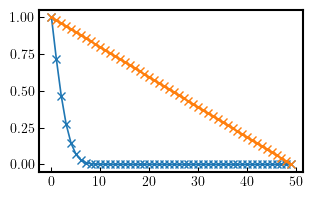

In [9]:
from scipy.stats import linregress as lr
from scipy.ndimage import gaussian_filter1d
from scipy import interpolate



t64 = np.array(t363open)
fFunc = upts/(upts+dwns)
print(fFunc)
fSmooth = fFunc
deltaTs = np.diff(t64)

for idx in range(len(fFunc)-1):
    if fFunc[idx+1] > fFunc[idx]:
        fFunc[idx+1] = fFunc[idx]

for smoothing in range(20):
    for idx in range(1,len(fFunc)-1):
        fSmooth[idx] = 0.1*fFunc[idx-1]+0.8*fFunc[idx]+0.1*fFunc[idx+1]
    fFunc = fSmooth


num_interp = 10000

t_interp = []
f_interp = []

for idxI in range(1,len(fFunc)):
    for idxJ in range(num_interp):
        t_interp.append((1.0*idxJ)/num_interp*(t64[idxI]-t64[idxI-1])+t64[idxI-1])
        f_interp.append((1.0*idxJ)/num_interp*(fFunc[idxI]-fFunc[idxI-1])+fFunc[idxI-1])

t_interp = np.array(t_interp)
f_interp = np.array(f_interp)

f_Linear = np.linspace(f_interp.max(),f_interp.min(),len(fFunc))

newTs = np.zeros(len(fFunc))
newTs[0] = t64[0]
newTs[-1] = t64[-1]
for idxI in range(1,len(fFunc)-1):
    idx = np.argmin(np.abs(f_interp-f_Linear[idxI]))
    newTs[idxI] = t_interp[idx] 

print(list(newTs))
plt.plot(fFunc,'x-')
plt.plot(f_Linear,'x-')
#plt.plot(t_interp,f_interp-f_Linear[39],)
#plt.show()

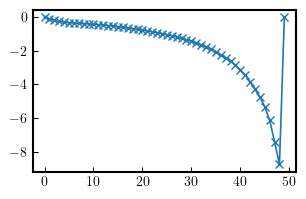

In [10]:
plt.plot(newTs-t64,'x-')
#plt.plot(t64,'x-')